In [1]:
import keras
import numpy as np
from tflearn.datasets import cifar10
from keras.optimizers import SGD
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Softmax
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Reshape, GlobalAveragePooling2D, GlobalAveragePooling1D
from keras.optimizers import Adam
from keras.initializers import RandomNormal
import matplotlib.pyplot as plt
import pandas as pd
import datetime

Using TensorFlow backend.


In [2]:

# Hyperparameters
batch_size = 64
num_classes = 10 #pegar automaticamente NumPy.Unique
epochs = 200



In [3]:
# Load Cifar-10 Data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()


#

x_train.shape
img_height, img_width, channel = x_train.shape[1],x_train.shape[2],x_train.shape[3]
#channel=1



In [4]:

#
x_train.shape

#


(50000, 32, 32, 3)

In [5]:
# convert to one hot encoing 
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)



In [6]:
img_width

32

In [7]:
model = Sequential()
#Filters = IMG_width/2 * 7
model.add(Conv2D(112, #alterado de 192 pra 112
                 (5,5), #alterado de 3 para 5 
                 strides=(2,2), 
                 activation='relu', 
                 padding='same',
                 data_format='channels_last',
                 use_bias=True, 
                 kernel_initializer=RandomNormal(mean=0.0, stddev=0.05, seed=None), 
                 bias_initializer='zeros',
                 input_shape=(img_height, img_width, channel)))

#calculo da quantidade de filtros da normalização:
# Width*heigth da saída após a primeira camada de convolução+pooling
######### RESIZED ###########
model.add(Conv2D(96, 
                 (1,1),  
                 strides=(1,1), 
                 activation='relu', 
                 padding='same',
                 kernel_initializer=RandomNormal(mean=0.0, stddev=0.05, seed=None), 
                 data_format='channels_last'))

model.add(Conv2D(96, 
                 (1,1),  
                 strides=(1,1), 
                 activation='relu', 
                 padding='same',
                 kernel_initializer=RandomNormal(mean=0.0, stddev=0.05, seed=None), 
                 data_format='channels_last'))
model.add(Dropout(0.5))

#Pooling
model.add(MaxPooling2D(pool_size=(2, 2), 
                       strides=(2,2)))



          
#Filters = IMG_width/2 * 9
model.add(Conv2D(144, #alterado de 128 para 144
                 (5,5), 
                 strides=(2,2), 
                 activation='relu', 
                 padding='same',
                 data_format='channels_last',
                 use_bias=True, 
                 kernel_initializer=RandomNormal(mean=0.0, stddev=0.05, seed=None), 
                 bias_initializer='zeros',
                 input_shape=(img_height, img_width, channel)))
#Normalização
model.add(Conv2D(96, 
                 (1,1),  
                 strides=(1,1), 
                 activation='relu', 
                 padding='same',
                 kernel_initializer=RandomNormal(mean=0.0, stddev=0.05, seed=None), 
                 data_format='channels_last'))

model.add(Conv2D(96, 
                 (1,1),  
                 strides=(1,1), 
                 activation='relu', 
                 padding='same',
                 kernel_initializer=RandomNormal(mean=0.0, stddev=0.05, seed=None), 
                 data_format='channels_last'))
model.add(Dropout(0.5))
#Pooling
model.add(MaxPooling2D(pool_size=(2, 2), 
                       strides=(2,2)))
#model.add(BatchNormalization())
######### RESIZED ###########


          
          
model.add(Flatten())
#IMG_width^ 2
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))

#camada anterior/2
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))

#Num de classes
model.add(Dense(10, activation='softmax'))


In [8]:

# print the model summary
model.summary()



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 16, 16, 112)       8512      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 96)        10848     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 96)        9312      
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 96)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 96)          0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 4, 4, 144)         345744    
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 4, 4, 96)          13920     
__________

In [9]:
# determine Loss function and Optimizer
model.compile(loss='categorical_crossentropy', #alterado de logcosh
              optimizer=SGD(lr=0.01, momentum=0.01, decay=0.0, nesterov=False),
              metrics=['accuracy'])


In [10]:

# Train the Model
#earlyStopping=keras.callbacks.EarlyStopping(monitor='val_acc', min_delta=0, patience=13, verbose=1, mode='auto')
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
 #                   callbacks=[earlyStopping],
                    validation_data=(x_test, y_test))



Train on 50000 samples, validate on 10000 samples
Epoch 1/200
50000/50000 [==============================] - 161s 3ms/step - loss: 2.2999 - acc: 0.1179 - val_loss: 2.2978 - val_acc: 0.1188
Epoch 2/200
50000/50000 [==============================] - 179s 4ms/step - loss: 2.2363 - acc: 0.1718 - val_loss: 2.1799 - val_acc: 0.2266
Epoch 3/200
50000/50000 [==============================] - 180s 4ms/step - loss: 2.0848 - acc: 0.2169 - val_loss: 2.1481 - val_acc: 0.2072
Epoch 4/200
50000/50000 [==============================] - 179s 4ms/step - loss: 2.0274 - acc: 0.2378 - val_loss: 2.0786 - val_acc: 0.2453
Epoch 5/200
50000/50000 [==============================] - 179s 4ms/step - loss: 1.9803 - acc: 0.2563 - val_loss: 2.0442 - val_acc: 0.2602
Epoch 6/200
50000/50000 [==============================] - 180s 4ms/step - loss: 1.9288 - acc: 0.2737 - val_loss: 1.9810 - val_acc: 0.2886
Epoch 7/200
50000/50000 [==============================] - 178s 4ms/step - loss: 1.8764 - acc: 0.2972 - val_loss: 1.

50000/50000 [==============================] - 175s 4ms/step - loss: 1.0291 - acc: 0.6297 - val_loss: 1.1777 - val_acc: 0.6041
Epoch 60/200
50000/50000 [==============================] - 175s 4ms/step - loss: 1.0196 - acc: 0.6330 - val_loss: 1.2461 - val_acc: 0.5695
Epoch 61/200
50000/50000 [==============================] - 175s 4ms/step - loss: 1.0124 - acc: 0.6373 - val_loss: 1.3017 - val_acc: 0.5310
Epoch 62/200
50000/50000 [==============================] - 175s 4ms/step - loss: 1.0099 - acc: 0.6391 - val_loss: 1.2515 - val_acc: 0.5629
Epoch 63/200
50000/50000 [==============================] - 175s 4ms/step - loss: 1.0002 - acc: 0.6435 - val_loss: 1.1671 - val_acc: 0.6046
Epoch 64/200
50000/50000 [==============================] - 176s 4ms/step - loss: 0.9953 - acc: 0.6435 - val_loss: 1.3865 - val_acc: 0.5304
Epoch 65/200
50000/50000 [==============================] - 174s 3ms/step - loss: 0.9874 - acc: 0.6451 - val_loss: 1.2074 - val_acc: 0.5953
Epoch 66/200
50000/50000 [=======

50000/50000 [==============================] - 173s 3ms/step - loss: 0.7200 - acc: 0.7444 - val_loss: 1.1498 - val_acc: 0.6014
Epoch 118/200
50000/50000 [==============================] - 173s 3ms/step - loss: 0.7100 - acc: 0.7481 - val_loss: 1.1734 - val_acc: 0.5878
Epoch 119/200
50000/50000 [==============================] - 172s 3ms/step - loss: 0.7070 - acc: 0.7484 - val_loss: 0.9908 - val_acc: 0.6516
Epoch 120/200
50000/50000 [==============================] - 175s 4ms/step - loss: 0.6948 - acc: 0.7525 - val_loss: 0.9686 - val_acc: 0.6570
Epoch 121/200
50000/50000 [==============================] - 176s 4ms/step - loss: 0.6946 - acc: 0.7534 - val_loss: 1.2581 - val_acc: 0.5703
Epoch 122/200
50000/50000 [==============================] - 174s 3ms/step - loss: 0.6923 - acc: 0.7543 - val_loss: 0.9893 - val_acc: 0.6550
Epoch 123/200
50000/50000 [==============================] - 175s 4ms/step - loss: 0.6849 - acc: 0.7575 - val_loss: 1.0353 - val_acc: 0.6366
Epoch 124/200
50000/50000 [

50000/50000 [==============================] - 178s 4ms/step - loss: 0.5158 - acc: 0.8167 - val_loss: 0.8642 - val_acc: 0.7030
Epoch 176/200
50000/50000 [==============================] - 176s 4ms/step - loss: 0.5145 - acc: 0.8167 - val_loss: 0.8199 - val_acc: 0.7165
Epoch 177/200
50000/50000 [==============================] - 177s 4ms/step - loss: 0.5141 - acc: 0.8159 - val_loss: 0.9487 - val_acc: 0.6769
Epoch 178/200
50000/50000 [==============================] - 176s 4ms/step - loss: 0.5093 - acc: 0.8150 - val_loss: 0.8053 - val_acc: 0.7198
Epoch 179/200
50000/50000 [==============================] - 176s 4ms/step - loss: 0.5068 - acc: 0.8204 - val_loss: 0.9362 - val_acc: 0.6772
Epoch 180/200
50000/50000 [==============================] - 175s 4ms/step - loss: 0.5003 - acc: 0.8216 - val_loss: 0.8623 - val_acc: 0.6960
Epoch 181/200
50000/50000 [==============================] - 177s 4ms/step - loss: 0.5001 - acc: 0.8216 - val_loss: 0.8742 - val_acc: 0.6915
Epoch 182/200
50000/50000 [

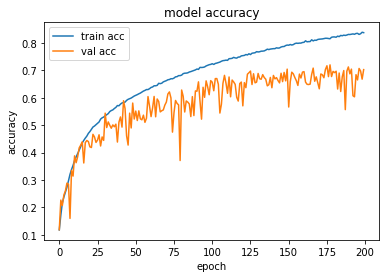

In [11]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train acc','val acc'], loc='upper left')
plt.show()

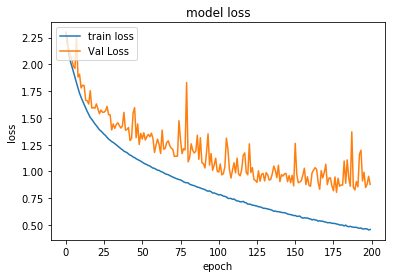

In [12]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train loss','Val Loss'], loc='upper left')
plt.show()

In [13]:
# Test the model
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.879244576263
Test accuracy: 0.7024


In [14]:
print(history.history)

{'val_loss': [2.2978183326721191, 2.1798529747009279, 2.1481394504547118, 2.0785659469604494, 2.0441820228576661, 1.9810065439224243, 1.9628087188720702, 2.2513577987670899, 1.8817993881225585, 1.9073553169250488, 1.7797517925262452, 1.8059421546936034, 1.800215927696228, 1.6655668968200683, 1.6600316053390503, 1.6296260927200317, 1.7536815450668335, 1.5920046401977539, 1.5970714733123779, 1.5897493911743164, 1.6305664300918579, 1.5832428039550781, 1.538946329498291, 1.5732579597473144, 1.5530490097045899, 1.5528968381881714, 1.5685280746459962, 1.6069751230239868, 1.5295821598052979, 1.5294218580245971, 1.3871532148361205, 1.4433675170898437, 1.4020445871353149, 1.437896886062622, 1.4544731269836426, 1.4294591793060303, 1.4048834529876708, 1.4229082664489745, 1.5519035997390747, 1.3849597023010254, 1.3923891435623168, 1.4102152561187744, 1.2881676876068116, 1.3087617042541504, 1.5450950538635253, 1.5955748857498169, 1.3152362247467042, 1.4436722148895265, 1.25106707572937, 1.355950899

In [15]:

data = pd.DataFrame(history.history)
nome = 'DoubleConvCifar10NormDropDesloc_t1' + str(datetime.datetime.now())+'.json'
data = data.to_json()
with open(nome, "w+") as output_file:
    output_file.write(data)